Welcome to your DataCamp project audition! This notebook must be filled out and vetted before a contract can be signed and you can start creating your project.

The first step is forking the repository in which this notebook lives. After that, there are two parts to be completed in this notebook:

- **Project information**:  The title of the project, a project description, etc.

- **Project introduction**: The three first text and code cells that will form the introduction of your project.

When complete, please email the link to your forked repo to projects@datacamp.com with the email subject line _DataCamp project audition_. If you have any questions, please reach out to projects@datacamp.com.

# Project information

**Project title**: Difference-in-differences using R.

**Name:** Neil Rankin.

**Email address associated with your DataCamp account:** neilrankin@sun.ac.za.

**Project description**: This will be read by the students on the DataCamp platform **before** deciding to start the project. The description should be three paragraphs, written in Markdown.

In 1847 Dr. Ignaz Semmelweis's introduction of handwashing in a Vienna hospital led to a dramatic fall in maternal deaths. How can we be sure that it was hadnwashing and not something else which **caused** this fall? In this project we will use a technique called **difference-in-differences** to compare the outcomes between a tretament group (the clinic which implemented handwashing) and a control group (another clinic) to determine the **impact** of handwashing.

The project builds on a [previous DataCamp project](https://www.datacamp.com/projects/49) where we used visualisation (using `ggplot`) to look at the death rates before and after the introduction of handwashing. We will use some of those skills, like data manipulation with the `tidyverse` and visualisation with `ggplot`, and introduce linear regression to compare outcomes between the treatment and control groups, before and after handwashing.

The dataset we will use is an extention of the data in the previous project and comprises births and deaths numbers for a nine year period. 


# Project introduction

***Note: nothing needs to be filled out in this cell. It is simply setting up the template cells below.***

The final output of a DataCamp project looks like a blog post: pairs of text and code cells that tell a story about data. The text is written from the perspective of the data analyst and *not* from the perspective of an instructor on DataCamp. So, for this blog post intro, all you need to do is pretend like you're writing a blog post -- forget the part about instructors and students.

Below you'll see the structure of a DataCamp project: a series of "tasks" where each task consists of a title, a **single** text cell, and a **single** code cell. There are 8-12 tasks in a project and each task can have up to 10 lines of code. What you need to do:
1. Read through the template structure.
2. As best you can, divide your project as it is currently visualized in your mind into tasks.
3. Fill out the template structure for the first three tasks of your project.

As you are completing each task, you may wish to consult the project notebook format in our [documentation](https://instructor-support.datacamp.com/projects/datacamp-projects-jupyter-notebook). Only the `@context` and `@solution` cells are relevant to this audition.

## 1. Dr. Semmelweis and the discovery of handwashing

In a [previous DataCamp project](https://www.datacamp.com/projects/49) we met Dr. Ignaz Semmelweis, a Hungarian physician who discovered the benefits of handwashing. In that project we used data visualisation to explore the link between handwashing and death as a result of childbirth in the mid-1800s in Vienna.

![**Dr. Semmelweis**](img/ignaz_semmelweis_1860.jpeg)

There were two things led Dr. Semmelweis to conclude that the lack of handwashing (or more specifically germs picked up from corpses and other sources) **caused** higher death rates amongst recent mothers. 

1. He noticed different death rates in two clinics. Clinic 1, which had many medical students who also examined corpses as part of their training, had higher death rates than clinic 2 which was mostly staffed by mid-wives who only tended to the women giving birth.
2. Once he made handwashing obligatory in the summer of 1847 death rates in clinic 1 fell substantially.

That's pretty strong evidence for the **impact** of handwashing on mother mortality but in this project we want to make sure that it is indeed the case using a methodlogy called **difference-in-differences** or **DiD**. We'll use an extended version of the data used previously to check that it was handwashing and not soemthing else that **caused** the reduction in maternal death rates.

At the same time as Dr. Semmelweis was instituting handwashing there were some other things happening in Vienna which could also have caused a decline in maternal deaths. In 1847 there was a [flood in Vienna](http://www.environmentandsociety.org/mml/painting-rescue-during-1847-vienna-flood) and a famous [confectioner](https://www.gerstner-konditorei.at/en/gerstner-collection/geschichte.html) (candy store) opened. Maybe the flood washed away diseases that were noxious to recent mothers or maybe the new chocolates provided some sort of protection against death after childbirth?



In [1]:
# Code and comments for the first task
# It should consist of up to 10 lines of code (not including comments)
# and take at most 10 seconds to execute on an average laptop.

## 2. Counterfactuals and difference-in-differences

Our previous analysis looked only at the group where handwashing was introduced (the **treatment** group). By looking only at this group we may be missing other things, like the flood or the chocolates, which could have affected all new mothers. 

To be able to say handwashing **caused** the decline in deaths we need to set up a **'counterfactual'** (or **control** group), a scenario to compare the outcomes of the treatment group against. Dr. Semmelweis already had a control group (which had influenced his thinking aboout the causes of maternal death) - clinic 2 where mid-wives attended the births.

**Difference-in-differences (DiD)** does exactly this - it compares the relative impact of a 'treatment' compared to what happens in a control group.

DiD compares the outcomes between: 

1. Two groups - the treatment (the handwashing group here) and a control. This is the first difference. And
2. Before and after the treatment. The second difference.

A DiD analysis thus looks at the performance of the treatment group relative to the control group. If it was something common between the two groups (like the chocolates) which affected the outcome we would expect both groups to change in a similar way. If it was the handwashing - which only applied to the treatment group, we would expect deaths in this group to fall relative to the control group.

Let's get started. In this first task we need to: 
- load the packages we'll need (the `tidyverse`);
- read in the data (this is a modified version of the data used in the previous hadnwashing project) using `read_csv`;
- use `mutate` to create a new variable `proportion_deaths` which will be the outcome variable of interest; 
- use `print()` to look at the data

In [2]:
# load the tidyverse
library(tidyverse)
# load the data
df <- read_csv("datasets/yearly_deaths_by_clinic.csv")
# create a new variable
df <- df %>% 
  mutate(proportion_deaths = deaths/births)
# look at the data
print(df)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.0     v purrr   0.2.5
v tibble  2.0.1     v dplyr   0.7.8
v tidyr   0.8.2     v stringr 1.3.1
v readr   1.3.1     v forcats 0.3.0
Warning message:
"package 'tibble' was built under R version 3.5.2"Warning message:
"package 'readr' was built under R version 3.5.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Parsed with column specification:
cols(
  year = col_double(),
  births = col_double(),
  deaths = col_double(),
  clinic = col_character()
)


# A tibble: 18 x 5
    year births deaths clinic   proportion_deaths
   <dbl>  <dbl>  <dbl> <chr>                <dbl>
 1  1841   3036    237 clinic 1            0.0781
 2  1842   3287    518 clinic 1            0.158 
 3  1843   3060    274 clinic 1            0.0895
 4  1844   3157    260 clinic 1            0.0824
 5  1845   3492    241 clinic 1            0.0690
 6  1846   4010    459 clinic 1            0.114 
 7  1847   3375    176 clinic 1            0.0521
 8  1848   3556     45 clinic 1            0.0127
 9  1849   3775     88 clinic 1            0.0233
10  1841   2442     86 clinic 2            0.0352
11  1842   2659    202 clinic 2            0.0760
12  1843   2739    164 clinic 2            0.0599
13  1844   2956     68 clinic 2            0.0230
14  1845   3241     66 clinic 2            0.0204
15  1846   3754    105 clinic 2            0.0280
16  1847   3165    135 clinic 2            0.0427
17  1848   3321    111 clinic 2            0.0334
18  1849   3575     98 clinic 2

## 3. Comparing the trends in deaths

To see the **impact** of handwashing on maternal deaths we need to look at how the trend in deaths in our treatment group (clinic 1) changed as the treatment was implemented (handwashing in 1847) and compare this to the trend in the control group (clinic 2). 

If the change in deaths is actually driven by handwashing we should see a fall in deaths in the treatment group relative to the control group. If the change was driven by something which affected both groups (like the new chocolate store) then we should see falls in both groups).

To look at this we'll start by plotting the proportion of deaths (`proportion_deaths`) over the time period (before and after the introduction of handwashing) and compare the trends for the two groups.

We can look at these trends using `ggplot`.

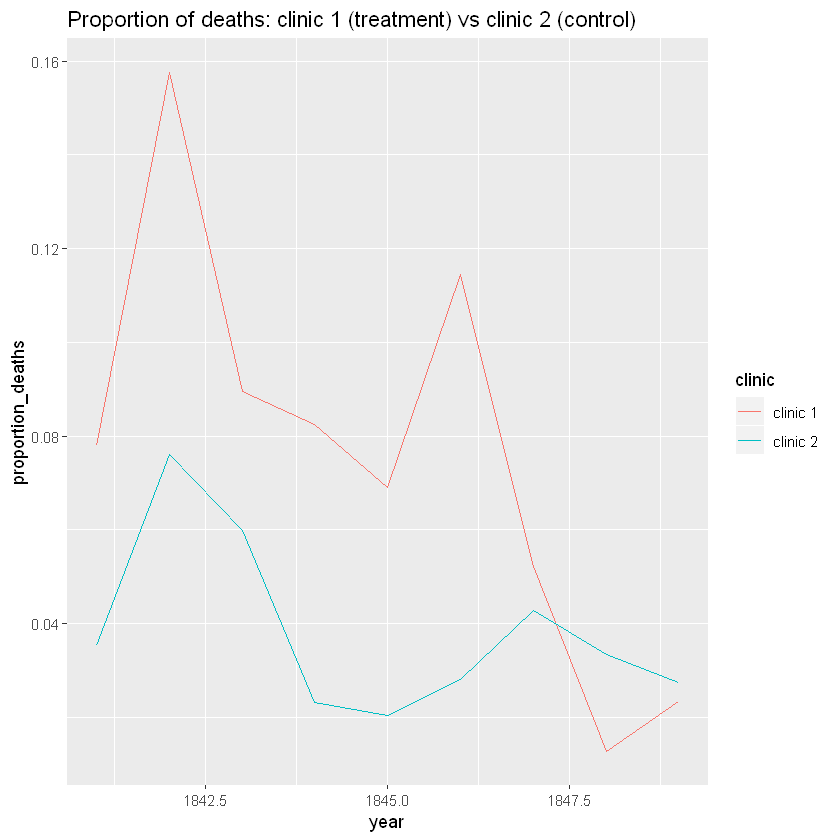

In [3]:
# Figure to compare trends in treatment and control groups
ggplot(df, aes(x = year, y = proportion_deaths, colour = clinic)) + 
  geom_line() + 
ggtitle("Proportion of deaths: clinic 1 (treatment) vs clinic 2 (control)") 

*Stop here! Only the three first tasks. :)*